# USA Regional Sales Analysis

In [1]:

#! Problem statement for project  
#? Analyze Acme Co.’s 2014–2018 sales data to identify key revenue and 
#^ trends and outliers; and align performance against budgets. Use these 
#* insights to optimize pricing, promotions, and market expansion for 
#! sustainable growth and reduced concentration risk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
file_path = r'C:\Users\karli\OneDrive\Desktop\all\python\data_assessing_cleaing\flipcart\Regional Sales Dataset.xlsx'


In [4]:
sheet = pd.read_excel(file_path,sheet_name=None)

In [5]:
df_sales=sheet['Sales Orders']

In [6]:
df_customer=sheet['Customers']

In [7]:
df_product=sheet['Products']

In [8]:
df_region=sheet['Regions']

In [9]:
df_state=sheet['State Regions']

In [10]:
df_budegt=sheet['2017 Budgets']

In [11]:
print(df_customer.shape)
print(df_sales.shape)
print(df_budegt.shape)
print(df_region.shape)
print(df_product.shape)
print(df_state.shape)

(175, 2)
(64104, 12)
(30, 2)
(994, 15)
(30, 2)
(49, 3)


In [12]:

#! checking the null values in this
df_region.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [13]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [14]:
df_product.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [15]:
df_budegt.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

In [16]:
df_state.isnull().sum()

Column1    0
Column2    0
Column3    0
dtype: int64

In [17]:
df_customer.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

merging all 

In [18]:
df_sales

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270
...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178


In [19]:
df_customer

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd
...,...,...
170,171,Accord Group
171,172,BB17 Company
172,173,H Ltd
173,174,Tekfly Group


In [20]:

#! merging with customer
df= df_sales.merge(df_customer,how='left',left_on='Customer Name Index',right_on='Customer Index')

In [21]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [22]:

#! merge on product index left 
df =df.merge(df_product, how='left', left_on='Product Description Index',right_on='Index')

In [23]:
df.tail()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,21788.4,980.478,74,Dazzlesphe Corp,26,Product 26
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,5185.8,579.081,51,Yombu Corp,21,Product 21
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,43483.0,2648.510,136,Bath Group,13,Product 13
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,27717.9,2930.178,158,Linklinks Ltd,20,Product 20
64103,SO - 0008654,2018-02-28,22,Distributor,USD,AXW291,807,15,8,998.3,7986.4,848.555,22,SAFEWAY Ltd,15,Product 15


In [24]:

#! merge on this basis of region and sales (delivery region index)
#! and region in id

df =df.merge(df_region,
             how='left',
             left_on='Delivery Region Index',
             right_on='id'
             )  

In [25]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [26]:
df_state

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West
5,CO,Colorado,West
6,CT,Connecticut,Northeast
7,DC,District of Columbia,South
8,DE,Delaware,South
9,FL,Florida,South


In [27]:

#! merging on the basis of state code and 
df= df.merge(df_state,
             how='left',
        left_on='state_code',
        right_on='Column1')

In [28]:
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,Column1,Column2,Column3
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,Georgia,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Indiana,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,California,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Indiana,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Connecticut,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,445,51326,18095,69878,26311722,253129,America/New York,PA,Pennsylvania,Northeast
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,847,69308,26242,71573,35271964,370235,America/Chicago,IL,Illinois,Midwest
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,954,57234,20651,42786,22943340,594611,America/New York,FL,Florida,South
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,716,87514,38912,48662,76228647,162756,America/New York,NY,New York,Northeast


In [29]:
df_budegt

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542
5,Product 6,1672229.416
6,Product 7,889737.555
7,Product 8,1085037.329
8,Product 9,710415.405
9,Product 10,864331.624


In [30]:

df=df.merge(df_budegt,how='left',on='Product Name')

In [31]:

# duplicate
df.duplicated().sum()

np.int64(0)

In [32]:
df.shape

(64104, 35)

In [33]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone',
       'Column1', 'Column2', 'Column3', '2017 Budgets'],
      dtype='object')

In [34]:

df.drop(columns=['Customer Index','Index','id','water_area','Column1', 'Column2', 'Column3',''],inplace=True,errors='ignore')


In [35]:
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,time_zone,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,America/New York,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,America/Indiana/Indianapolis,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,America/Los Angeles,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,America/Indiana/Indianapolis,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,America/New York,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,CDP,40.15511,-74.82877,445,51326,18095,69878,26311722,America/New York,5685138.270
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,Village,42.11030,-88.03424,847,69308,26242,71573,35271964,America/Chicago,959899.218
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,City,26.24453,-80.20644,954,57234,20651,42786,22943340,America/New York,3720639.645
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,Town,42.91002,-78.74182,716,87514,38912,48662,76228647,America/New York,2067108.120


In [36]:
df.drop(columns=['currency code','population','time_zone','land_area','area_code'],inplace=True,errors='ignore')

In [37]:
# df = df.columns.str.lower()

In [38]:
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,name,county,state_code,state,type,latitude,longitude,households,median_income,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,52798,36466,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,Greenwood,Johnson County,IN,Indiana,City,39.61366,-86.10665,20975,54176,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,Pleasanton,Alameda County,CA,California,City,37.66243,-121.87468,26020,124759,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,Bloomington,Monroe County,IN,Indiana,City,39.16533,-86.52639,30232,30019,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Manchester,Hartford County,CT,Connecticut,Town,41.77524,-72.52443,24141,63158,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,Levittown,Bucks County,PA,Pennsylvania,CDP,40.15511,-74.82877,18095,69878,5685138.270
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,Palatine,Cook County,IL,Illinois,Village,42.11030,-88.03424,26242,71573,959899.218
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,Margate,Broward County,FL,Florida,City,26.24453,-80.20644,20651,42786,3720639.645
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,Cheektowaga,Erie County,NY,New York,Town,42.91002,-78.74182,38912,48662,2067108.120


In [39]:

# blank all other budget for non 2017 orders
df.loc[df['OrderDate'].dt.year != 2017,'2017 Budgets']=pd.NA  

In [40]:
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,name,county,state_code,state,type,latitude,longitude,households,median_income,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,52798,36466,NaN
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,Greenwood,Johnson County,IN,Indiana,City,39.61366,-86.10665,20975,54176,NaN
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,Pleasanton,Alameda County,CA,California,City,37.66243,-121.87468,26020,124759,NaN
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,Bloomington,Monroe County,IN,Indiana,City,39.16533,-86.52639,30232,30019,NaN
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Manchester,Hartford County,CT,Connecticut,Town,41.77524,-72.52443,24141,63158,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,Levittown,Bucks County,PA,Pennsylvania,CDP,40.15511,-74.82877,18095,69878,NaN
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,Palatine,Cook County,IL,Illinois,Village,42.11030,-88.03424,26242,71573,NaN
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,Margate,Broward County,FL,Florida,City,26.24453,-80.20644,20651,42786,NaN
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,Cheektowaga,Erie County,NY,New York,Town,42.91002,-78.74182,38912,48662,NaN


In [41]:
df.describe()

,OrderDate,Customer Name Index,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,latitude,longitude,households,median_income,2017 Budgets
count,64104,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,6.410400e+04,64104.000000,1.526300e+04
mean,2016-01-29 01:28:20.935979008,87.480064,495.086609,14.913141,8.441689,2284.380803,19280.682937,1432.083899,37.769427,-94.247116,5.702520e+04,59396.944325,2.989305e+06
min,2014-01-01 00:00:00,1.000000,1.000000,1.000000,5.000000,167.500000,837.500000,68.675000,25.468720,-123.262040,0.000000e+00,0.000000,5.944716e+05
25%,2015-01-13 00:00:00,45.000000,247.000000,6.000000,6.000000,1031.800000,8019.900000,606.216000,33.953330,-112.034140,2.263900e+04,43163.000000,1.672229e+06
50%,2016-01-27 00:00:00,87.000000,493.000000,15.000000,8.000000,1855.900000,14023.100000,1084.495500,39.114170,-88.200900,2.951800e+04,53587.500000,3.016489e+06
75%,2017-02-13 00:00:00,130.000000,742.000000,24.000000,10.000000,3606.275000,27416.400000,2046.933750,41.676550,-80.407000,4.540900e+04,71897.000000,3.925425e+06
max,2018-02-28 00:00:00,175.000000,994.000000,30.000000,12.000000,6566.000000,78711.600000,5498.556000,48.759550,-70.255330,3.113535e+06,149837.000000,5.685138e+06
std,NaN,49.884946,285.645893,8.787032,2.276217,1663.598141,15429.602766,1107.705728,5.068599,16.884334,1.437733e+05,21556.192739,1.557271e+06


In [42]:
df['OrderDate'] =pd.to_datetime(df['OrderDate'])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust

In [44]:

# filter only year 2017

df_2017 = df[df['OrderDate'].dt.year==2017]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OrderNumber                64104 non-null  object        
 1   OrderDate                  64104 non-null  datetime64[ns]
 2   Customer Name Index        64104 non-null  int64         
 3   Channel                    64104 non-null  object        
 4   Currency Code              64104 non-null  object        
 5   Warehouse Code             64104 non-null  object        
 6   Delivery Region Index      64104 non-null  int64         
 7   Product Description Index  64104 non-null  int64         
 8   Order Quantity             64104 non-null  int64         
 9   Unit Price                 64104 non-null  float64       
 10  Line Total                 64104 non-null  float64       
 11  Total Unit Cost            64104 non-null  float64       
 12  Cust

In [46]:
df_2017.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,name,county,state_code,state,type,latitude,longitude,households,median_income,2017 Budgets
46363,SO - 0002544,2017-01-01,107,Wholesale,USD,NXH382,711,30,6,1239.5,...,Union City,Hudson County,NJ,New Jersey,City,40.77955,-74.02375,23029,41107,1011609.684
46364,SO - 0006431,2017-01-01,116,Wholesale,USD,NXH382,234,13,5,1829.1,...,Grand Junction,Mesa County,CO,Colorado,City,39.06387,-108.55065,24290,45358,3720639.645
46365,SO - 0007491,2017-01-01,45,Wholesale,USD,NXH382,108,15,9,2412.0,...,Inglewood,Los Angeles County,CA,California,City,33.96168,-118.35313,36667,42044,3299478.315
46366,SO - 0008741,2017-01-01,169,Wholesale,USD,GUT930,375,8,8,904.5,...,Dubuque,Dubuque County,IA,Iowa,City,42.50056,-90.66457,23901,47450,1085037.329
46367,SO - 0009295,2017-01-01,20,Wholesale,USD,NXH382,339,2,12,1112.2,...,Spring Hill,Hernando County,FL,Florida,CDP,28.47689,-82.52546,39038,41308,3050087.565


# Feature engineering Profit_mergin_pct

In [47]:
df.rename(columns={'Line Total':'revenue'},inplace=True)

In [48]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price', 'revenue',
       'Total Unit Cost', 'Customer Names', 'Product Name', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude', 'households',
       'median_income', '2017 Budgets'],
      dtype='object')

In [49]:

#* for  profit we have to 
#^ subtract revenue - total cost * order quality 
#? to get profit
#! the profit_mer_pct
df['profit'] = df['revenue']- df['Total Unit Cost']*df['Order Quantity']

In [50]:
df['profit'].head()

0     4048.542
1    11899.602
2     1760.760
3     9166.136
4     8249.040
Name: profit, dtype: float64

In [51]:
df['profit_mer_pct']= df['profit']/df['revenue']*100

# EDA

<Figure size 1000x1000 with 0 Axes>

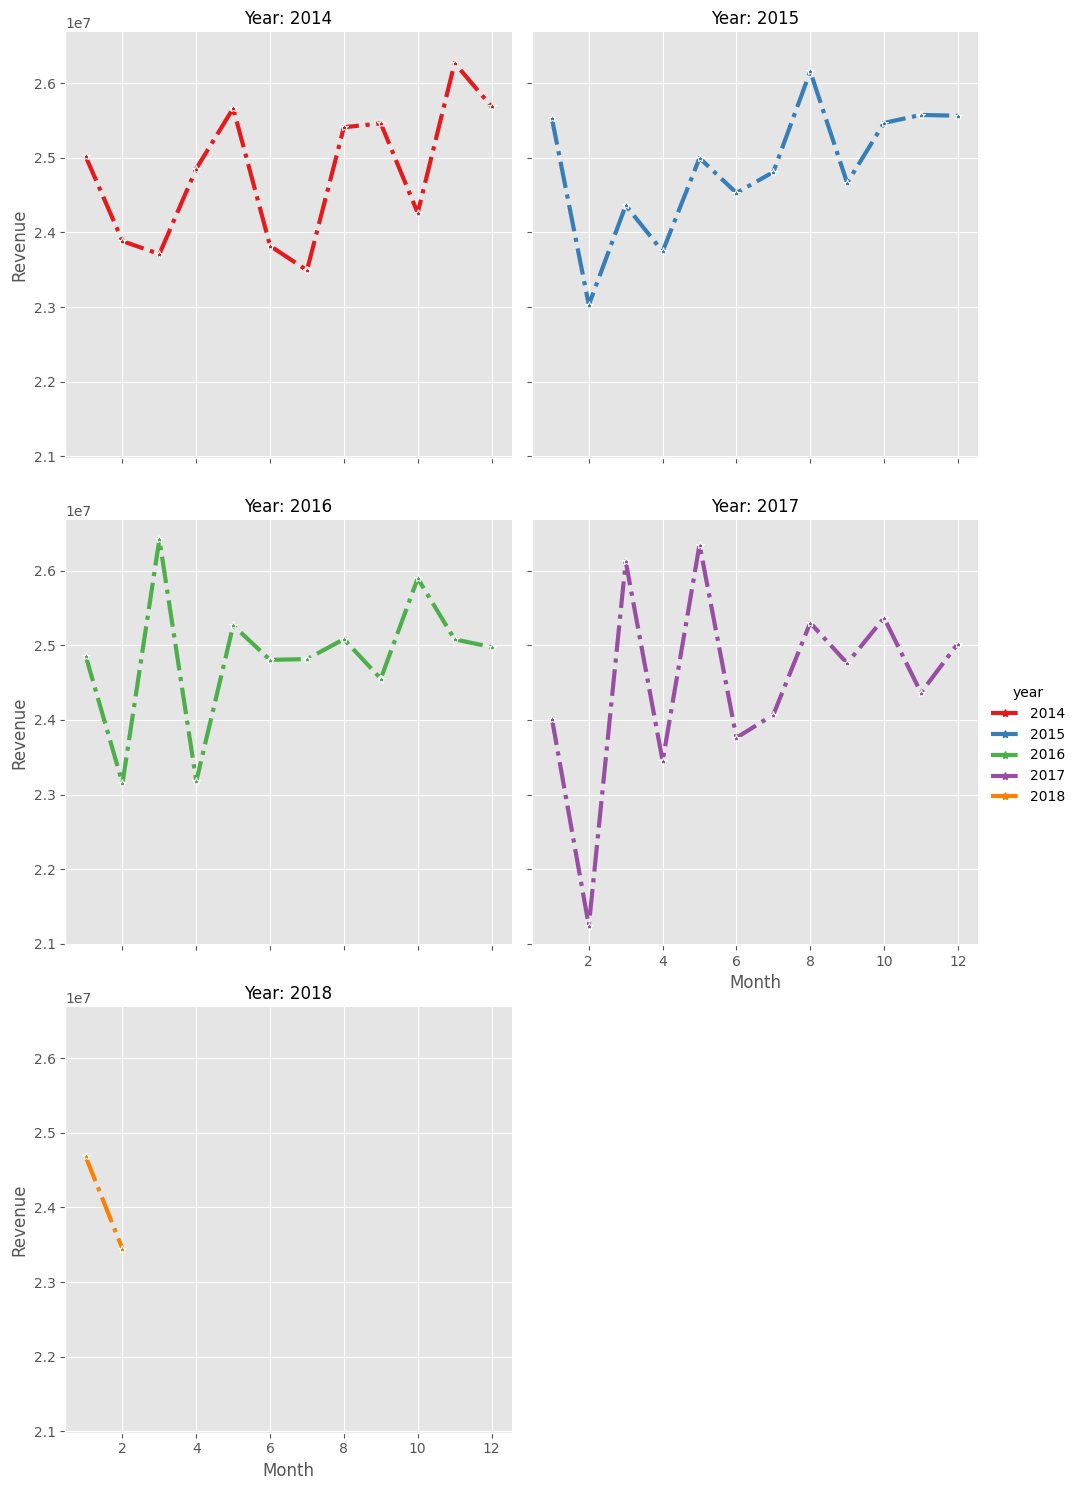

In [52]:

#! montly sale plt
df['month'] =df['OrderDate'].dt.month
df['year']=df['OrderDate'].dt.year
plt.figure(figsize=(10,10))
month =df.groupby(['month','year'])['revenue'].sum().reset_index()
g =sns.relplot(data=month,x='month',y='revenue',errorbar= None,marker='*',linestyle='dashdot',linewidth=3,hue='year',col='year',kind='line',col_wrap=2,palette='Set1')


g.set_axis_labels("Month", "Revenue")
g.set_titles("Year: {col_name}")
plt.show()

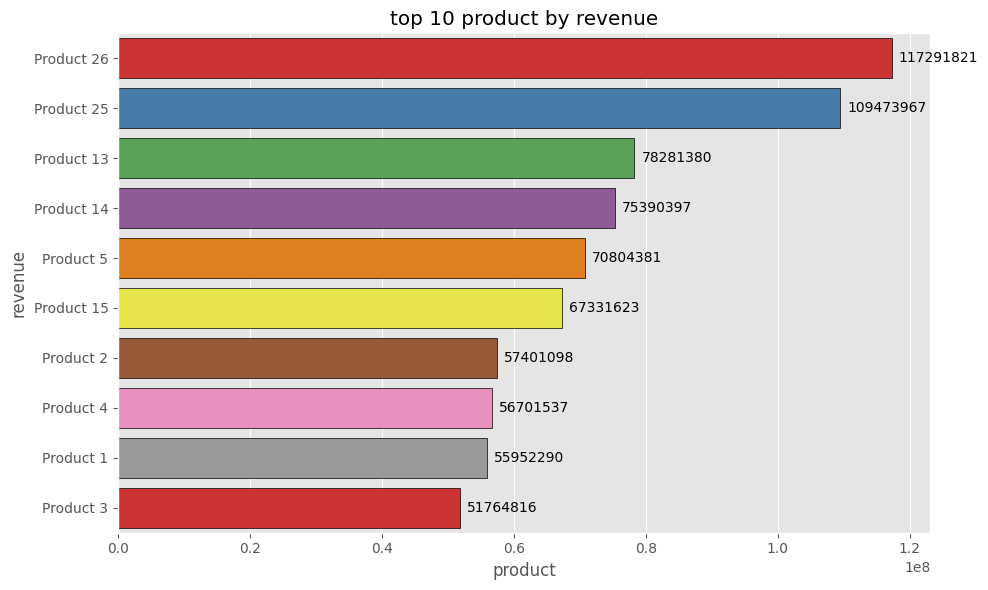

In [53]:

#! top 10 product by revenue
plt.figure(figsize=(10,6))
pro =df.groupby('Product Name')['revenue'].sum().sort_values(ascending=0).head(10).reset_index()
ax =sns.barplot(data=pro,y='Product Name',x='revenue',palette='Set1',edgecolor='black')
plt.title('top 10 product by revenue')
plt.xlabel('product')
plt.ylabel('revenue')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=5)

plt.tight_layout()
plt.show()


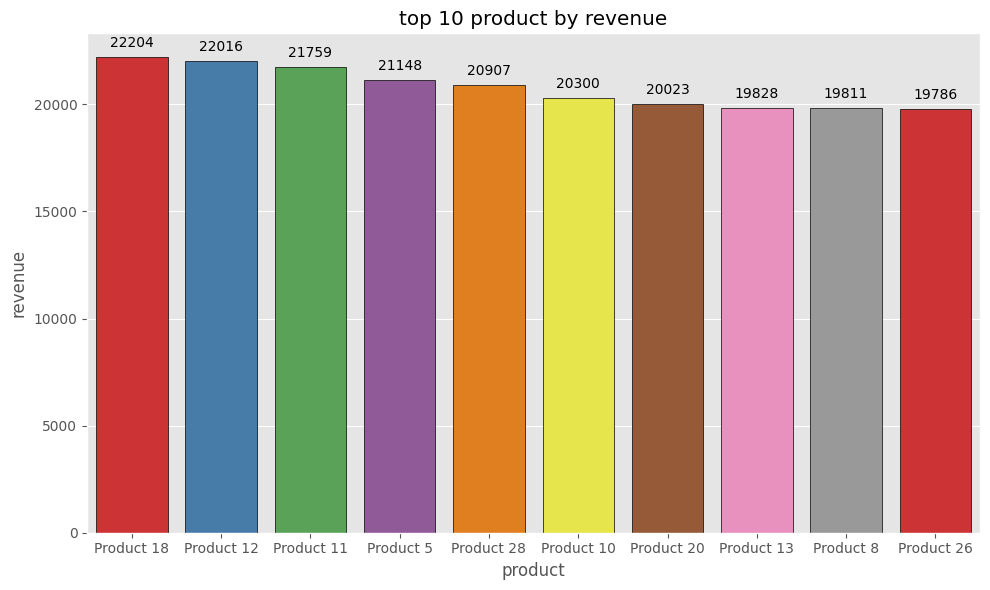

In [54]:


#! top 10  average product by revenue
plt.figure(figsize=(10,6))
pro =df.groupby('Product Name')['revenue'].mean().sort_values(ascending=0).head(10).reset_index()
ax =sns.barplot(data=pro,x='Product Name',y='revenue',palette='Set1',edgecolor='black')
plt.title('top 10 product by revenue')
plt.xlabel('product')
plt.ylabel('revenue')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=5)

plt.tight_layout()
plt.show()


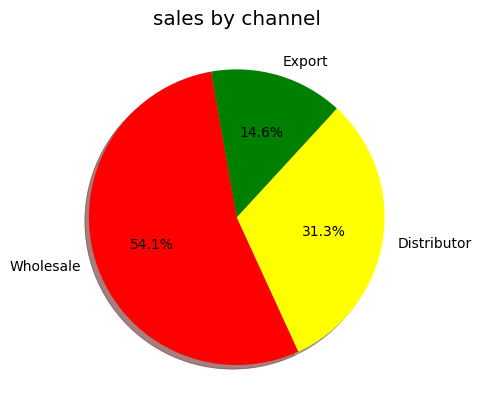

In [55]:

#! sales by channel pie chart and give
chanel_sale = df.groupby('Channel')['revenue'].sum().sort_values(ascending=0).reset_index()

plt.pie(chanel_sale['revenue'],labels=chanel_sale['Channel'],autopct='%0.1f%%',colors=['red','yellow','green'],shadow=True,startangle=100,)
plt.title("sales by channel")

plt.show()

In [56]:
df['Order Quantity']

0         6
1        11
2         6
3         7
4         8
         ..
64099    12
64100     6
64101    11
64102     7
64103     8
Name: Order Quantity, Length: 64104, dtype: int64

In [57]:
df['OrderNumber']

0         SO - 000225
1        SO - 0003378
2        SO - 0005126
3        SO - 0005614
4        SO - 0005781
             ...     
64099    SO - 0007573
64100    SO - 0007706
64101    SO - 0007718
64102    SO - 0008084
64103    SO - 0008654
Name: OrderNumber, Length: 64104, dtype: object

Text(0.5, 1.0, 'revenue vs order number distrubutation')

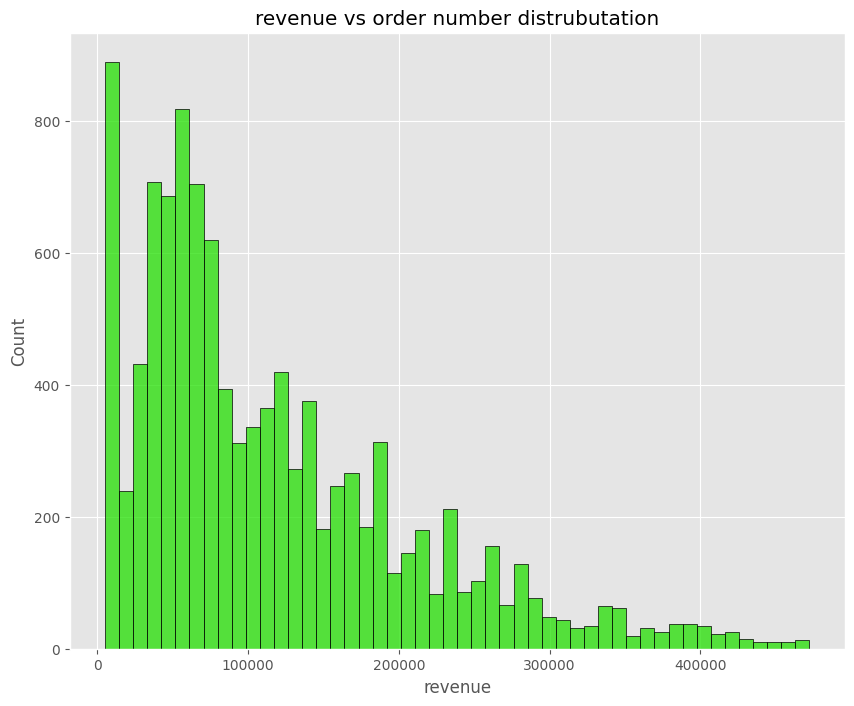

In [58]:

#! average order number  aov distrubutation
aov =df.groupby('OrderNumber')['revenue'].sum()
plt.figure(figsize=(10,8))
sns.histplot(aov,edgecolor='black',bins=50,color="#23df02")
plt.title('revenue vs order number distrubutation')

In [59]:

#!unit price distrubutaion for top 10 product
# unit_sum =df.groupby('Product Name')['Unit Price'].sum()

# top_10_products = unit_sum.sort_values(ascending=False).head(10)
# top = df[df['Product Name']].isin(top_10_products)
# sns.boxplot(top,x='Product Name',y='Unit Price')
# # top_10 = df[df['Product Name'].isin(unit)]
# # sns.boxplot(data=top_10,x='Product Name',y='Unit Price')

<Figure size 1400x800 with 0 Axes>

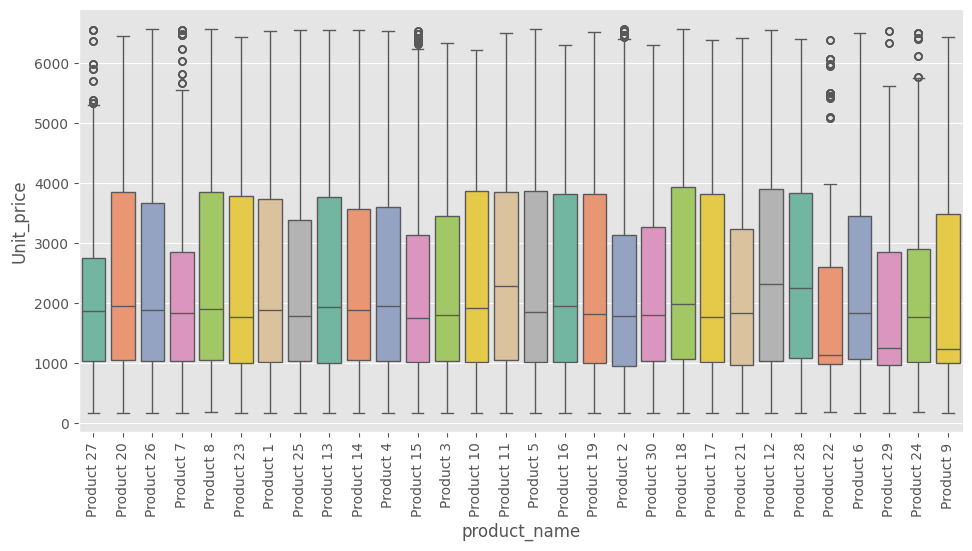

In [60]:

#!unit price distrubutaion per product
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
ax =sns.catplot(data=df,x ='Product Name',y='Unit Price',kind='box',height=5,aspect=2,palette='Set2')
ax.set_axis_labels('product_name','Unit_price')
ax.set_xticklabels(rotation=90)

In [61]:
df['OrderNumber']

0         SO - 000225
1        SO - 0003378
2        SO - 0005126
3        SO - 0005614
4        SO - 0005781
             ...     
64099    SO - 0007573
64100    SO - 0007706
64101    SO - 0007718
64102    SO - 0008084
64103    SO - 0008654
Name: OrderNumber, Length: 64104, dtype: object

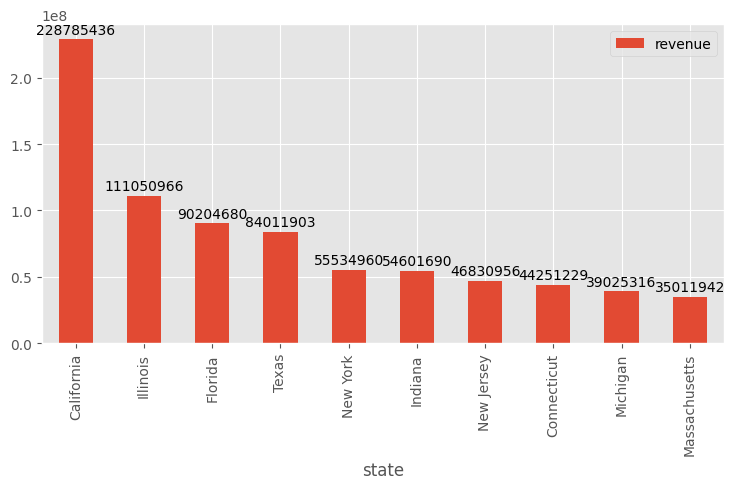

In [62]:

#* top 10state by revenue 
b =df.groupby('state').aggregate({
    'revenue':'sum',
    
    
}).sort_values(by='revenue',ascending=0).head(10).plot(kind='bar',figsize=(7.5,5))

for d in b.containers:
    b.bar_label(d,fmt='%.0f',label_type='edge',padding=2)
plt.tight_layout()

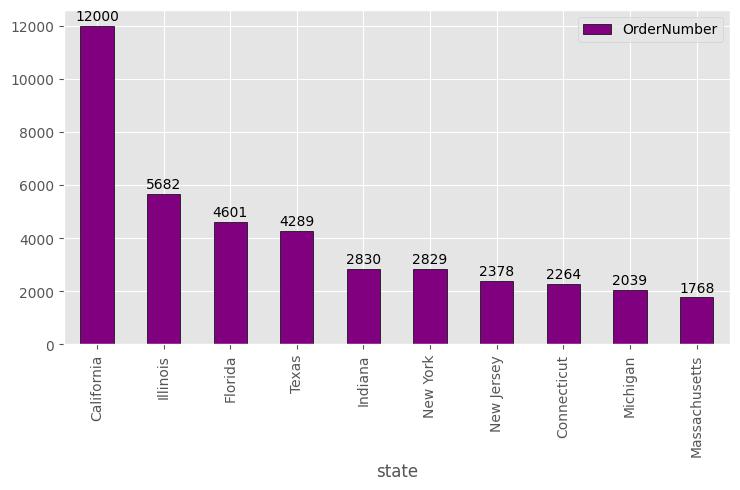

In [63]:

#! top 10 state by revenue and order num
b =df.groupby('state').aggregate({
    'OrderNumber':'count'
    
    
}).sort_values(by='OrderNumber',ascending=0).head(10).plot(kind='bar',figsize=(7.5,5),color ='purple',edgecolor='black' )

for d in b.containers:
    b.bar_label(d,fmt='%.0f',label_type='edge',padding=2)
plt.tight_layout()

In [64]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price', 'revenue',
       'Total Unit Cost', 'Customer Names', 'Product Name', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude', 'households',
       'median_income', '2017 Budgets', 'profit', 'profit_mer_pct', 'month',
       'year'],
      dtype='object')

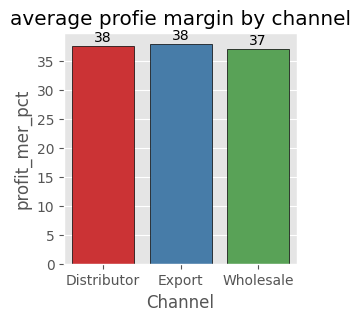

In [65]:

#! average profit margin by channel
data =df.groupby('Channel')['profit_mer_pct'].mean()
plt.figure(figsize=(3,3))
b =sns.barplot(data=data,palette='Set1',edgecolor='black')
plt.title('average profie margin by channel')

for i in b.containers:
    b.bar_label(i,fmt='%.f',label_type='edge',padding=1)


Text(0.5, 1.0, 'TOP 10 customer by revenue')

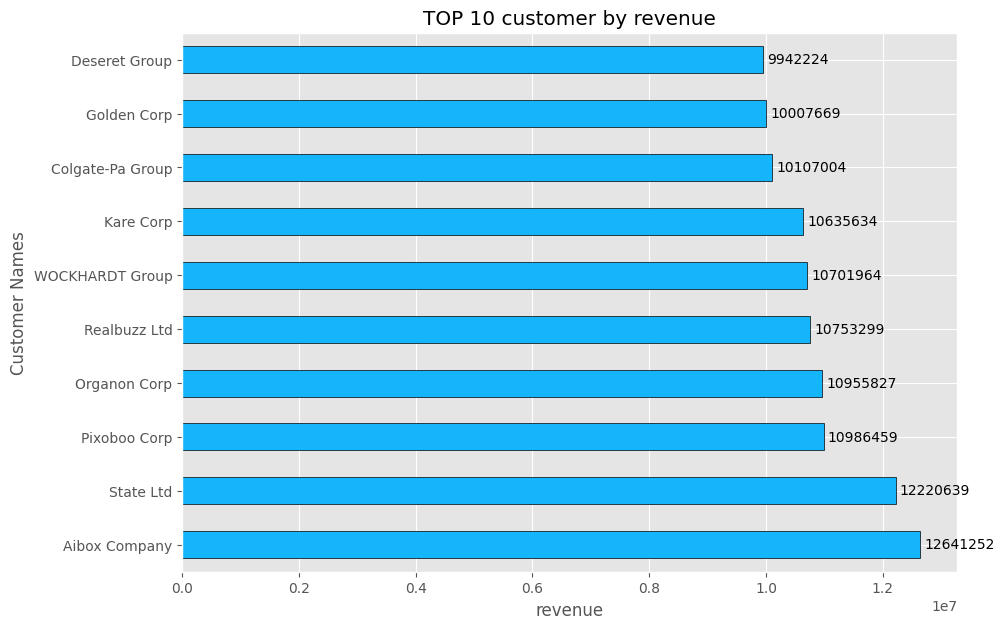

In [66]:

#! top 10 customer by high revenue 

top_cust=df.groupby('Customer Names')['revenue'].sum().sort_values(ascending=0).head(10)
ax = top_cust.plot(kind='barh',color="#14B5FA",edgecolor='black',figsize=(10,7))

for o in ax.containers:
    ax.bar_label(o,fmt='%.0f',label_type='edge',padding=3)
plt.xlabel('revenue')
plt.title('TOP 10 customer by revenue')

Text(0.5, 1.0, 'TOP 10 customer by low revenue')

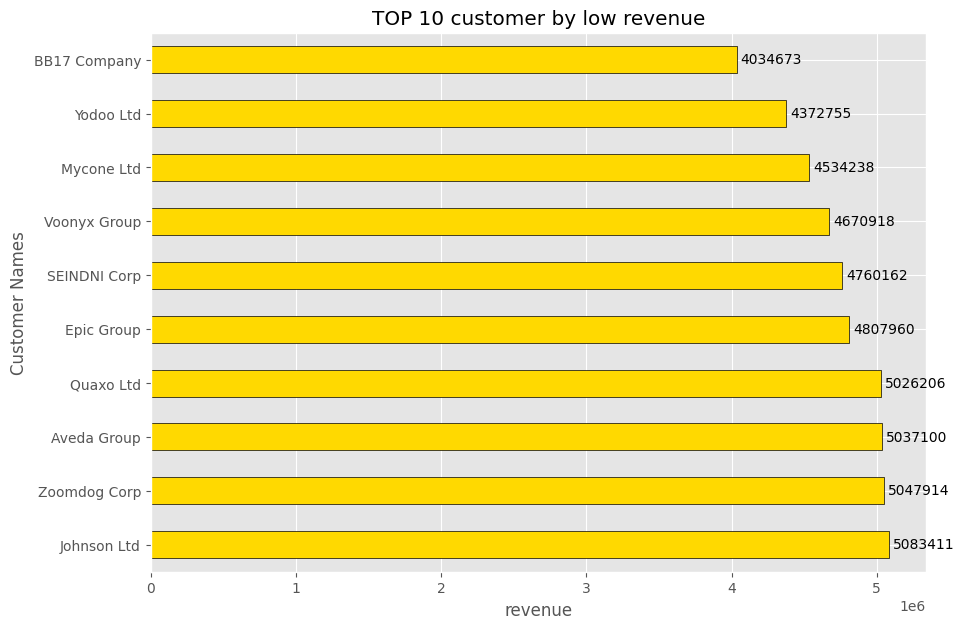

In [67]:

#! top 10 customer by low revenue 

top_cust=df.groupby('Customer Names')['revenue'].sum().sort_values(ascending=0).tail(10)
ax = top_cust.plot(kind='barh',color='#FFD900',edgecolor='black',figsize=(10,7),)

for o in ax.containers:
    ax.bar_label(o,fmt='%.0f',label_type='edge',padding=3)
plt.xlabel('revenue')
plt.title('TOP 10 customer by low revenue')

In [68]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price', 'revenue',
       'Total Unit Cost', 'Customer Names', 'Product Name', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude', 'households',
       'median_income', '2017 Budgets', 'profit', 'profit_mer_pct', 'month',
       'year'],
      dtype='object')

In [71]:

#? customer segmentation by revenue vs profit margin
plt.style.use('ggplot')
scatter =df.groupby('Customer Names').aggregate({
    'revenue':'sum',
    'profit':'sum',
    'profit_mer_pct':'sum',
    'Order Quantity':'sum'
    
    
})

top = scatter.sort_values(by=revenue,ascending=0)

s = plt.scatter(
    top['']
    
)

NameError: name 'revenue' is not defined

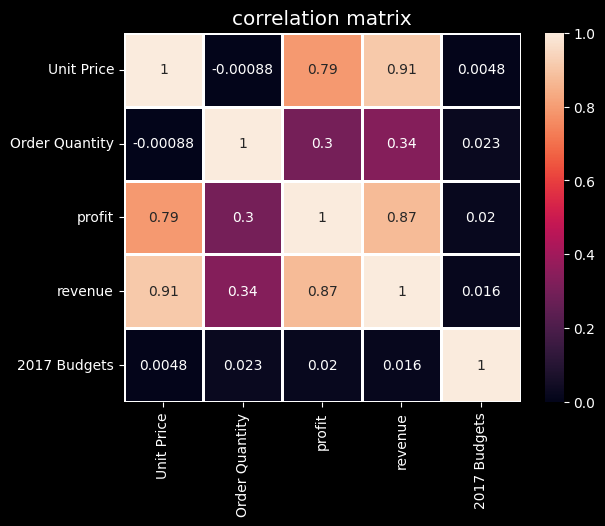

In [ ]:

#^ heatmap for order quality unit price revenue total cost profit
no =['Unit Price','Order Quantity','profit','revenue','2017 Budgets']
corr = df[no].corr()
corr
plt.style.use('dark_background')
sns.heatmap(corr,annot=True,linewidths=1,linecolor='white')

plt.title("correlation matrix")

plt.show()

<Axes: >

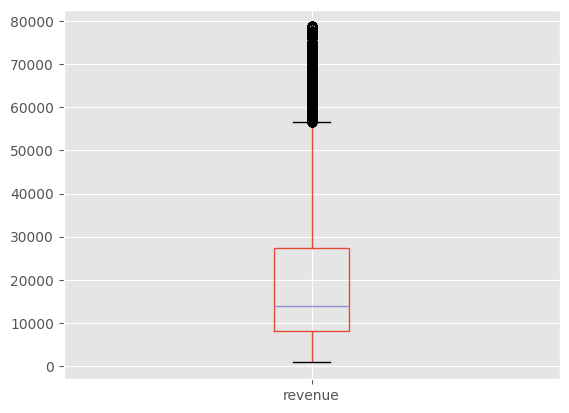

In [74]:

df['revenue'].describe()
df.boxplot(column='revenue')


In [75]:
df_2017 = df[df['year']==2017]
df_2017.groupby('Customer Names')[['revenue','2017 Budgets']].sum()
df_2017['Variance'] = df_2017['revenue'] - df_2017['2017 Budgets']
